<a href="https://colab.research.google.com/github/Sibindra/Python/blob/master/machine-learning/core_algos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Fundamental algorithms
some of the fundamental ML algorithms include 

- linear regression
- classification
- clustering
- hidden markov models

### Setup

In [ ]:
!pip install -q sklearn

  Preparing metadata (setup.py) ... done


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

### Linear regression

- it is used when there is linear correspondance between components. 
- it can be used to predict data by creating a `line of best fit`.
- ```y = mx + c``` is used to predict point 


#### Example 

In [ ]:
df_train = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv") # training data 
df_eval = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/eval.csv") # testing data 

In [ ]:
df_eval.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,35.0,0,0,8.0500,Third,unknown,Southampton,y
1,0,male,54.0,0,0,51.8625,First,E,Southampton,y
2,1,female,58.0,0,0,26.5500,First,C,Southampton,y
3,1,female,55.0,0,0,16.0000,Second,unknown,Southampton,y
4,1,male,34.0,0,0,13.0000,Second,D,Southampton,y


In [ ]:
# removing survived column and store it to y 
y_train = df_train.pop("survived")
y_eval = df_eval.pop("survived")

In [ ]:
df_train.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [ ]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
622    0
623    0
624    1
625    0
626    0
Name: survived, Length: 627, dtype: int64

In [ ]:
df_train.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [ ]:
df_train.shape # 637 x 9 columns

(627, 9)

#### data insights

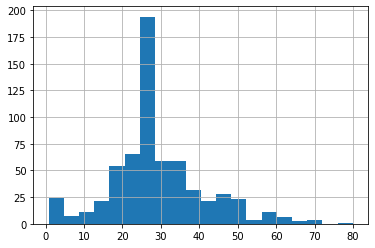

In [ ]:
df_train.age.hist(bins = 20)

In [ ]:
df_train['sex'].value_counts() # value_counts is a pandas function to give count of values here count of male and count of female

male      410
female    217
Name: sex, dtype: int64

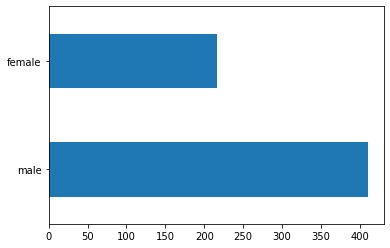

In [ ]:
df_train['sex'].value_counts().plot(kind = "barh") 

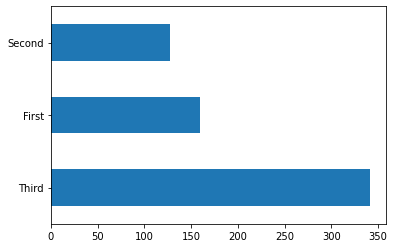

In [ ]:
df_train['class'].value_counts().plot(kind = 'barh')

Text(0.5, 0, '% survive by sex')

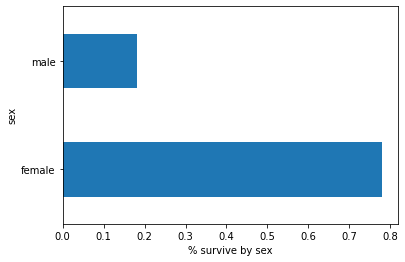

In [ ]:
pd.concat([df_train,y_train],axis = 1).groupby("sex").survived.mean().plot(kind = 'barh').set_xlabel('% survive by sex')

Text(0.5, 0, '% survive by class')

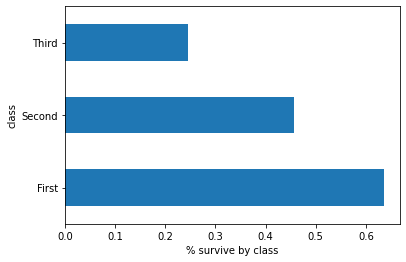

In [ ]:
pd.concat([df_train,y_train],axis = 1).groupby("class").survived.mean().plot(kind = 'barh').set_xlabel('% survive by class')

#### Conclusion
- majority are in their 20's
- majority are in third class
- female and first class have more survival chance